In [1]:
import os
import os.path
import random
from operator import add
from datetime import datetime, date, timedelta

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import shutil
import time

from scipy.integrate import simps
from numpy import trapz
from decimal import Decimal, ROUND_DOWN, ROUND_UP

In [2]:
pd.set_option('display.max_columns',69)
pd.set_option('display.max_rows',119)

In [3]:
# load the data
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case1_sattel-hochstuckli\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case2_Atzmaening\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1339\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1822\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2000\setup1'
root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2500\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b1564\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2141\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2584\setup1'

rootOut = os.path.join(root, 'Results_3')
df_final_tipping_point_1980 = pd.read_csv(os.path.join(rootOut, 'df_final_tipping_point_1980.csv'))
df_final_tipping_point_2020 = pd.read_csv(os.path.join(rootOut, 'df_final_tipping_point_2020.csv'))
df_final_tipping_point_2050 = pd.read_csv(os.path.join(rootOut, 'df_final_tipping_point_2050.csv'))
df_final_tipping_point_2070 = pd.read_csv(os.path.join(rootOut, 'df_final_tipping_point_2070.csv'))

df_policies = pd.read_csv(os.path.join(rootOut, 'df_policies.csv'))

In [4]:
df_final_tipping_point_1980

,tippingPoint26_1980,tippingPoint26_1_1980,scenario26_1980,policy26_1980,tippingPoint45_1980,tippingPoint45_1_1980,scenario45_1980,policy45_1980,tippingPoint85_1980,tippingPoint85_1_1980,scenario85_1980,policy85_1980
0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0
3,0.0,0.0,0.0,19.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,9.0
4,0.0,0.0,0.0,22.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3011,NaN,NaN,NaN,NaN,0.0,0.0,44.0,191.0,0.0,0.0,44.0,189.0
3012,NaN,NaN,NaN,NaN,0.0,0.0,44.0,196.0,0.0,0.0,44.0,193.0
3013,NaN,NaN,NaN,NaN,0.0,0.0,44.0,198.0,0.0,0.0,44.0,195.0
3014,NaN,NaN,NaN,NaN,0.0,0.0,44.0,199.0,0.0,0.0,44.0,197.0


In [5]:
#####Scenario_26####

tippingPoint26_All_1980 = df_final_tipping_point_1980['tippingPoint26_1980'].value_counts()
tippingPoint26_Accepted_1980 = df_final_tipping_point_1980['tippingPoint26_1_1980'].value_counts()
scenario26_1980 = df_final_tipping_point_1980['scenario26_1980'].value_counts()
policy26_1980 = df_final_tipping_point_1980['policy26_1980'].value_counts()

tippingPoint26_All_2020 = df_final_tipping_point_2020['tippingPoint26_2020'].value_counts()
tippingPoint26_Accepted_2020 = df_final_tipping_point_2020['tippingPoint26_1_2020'].value_counts()
scenario26_2020 = df_final_tipping_point_2020['scenario26_2020'].value_counts()
policy26_2020 = df_final_tipping_point_2020['policy26_2020'].value_counts()

tippingPoint26_All_2050 = df_final_tipping_point_2050['tippingPoint26_2050'].value_counts()
tippingPoint26_Accepted_2050 = df_final_tipping_point_2050['tippingPoint26_1_2050'].value_counts()
scenario26_2050 = df_final_tipping_point_2050['scenario26_2050'].value_counts()
policy26_2050 = df_final_tipping_point_2050['policy26_2050'].value_counts()

tippingPoint26_All_2070 = df_final_tipping_point_2070['tippingPoint26_2070'].value_counts()
tippingPoint26_Accepted_2070 = df_final_tipping_point_2070['tippingPoint26_1_2070'].value_counts()
scenario26_2070 = df_final_tipping_point_2070['scenario26_2070'].value_counts()
policy26_2070 = df_final_tipping_point_2070['policy26_2070'].value_counts()

#####Scenario_45####

tippingPoint45_All_1980 = df_final_tipping_point_1980['tippingPoint45_1980'].value_counts()
tippingPoint45_Accepted_1980 = df_final_tipping_point_1980['tippingPoint45_1_1980'].value_counts()
scenario45_1980 = df_final_tipping_point_1980['scenario45_1980'].value_counts()
policy45_1980 = df_final_tipping_point_1980['policy45_1980'].value_counts()

tippingPoint45_All_2020 = df_final_tipping_point_2020['tippingPoint45_2020'].value_counts()
tippingPoint45_Accepted_2020 = df_final_tipping_point_2020['tippingPoint45_1_2020'].value_counts()
scenario45_2020 = df_final_tipping_point_2020['scenario45_2020'].value_counts()
policy45_2020 = df_final_tipping_point_2020['policy45_2020'].value_counts()

tippingPoint45_All_2050 = df_final_tipping_point_2050['tippingPoint45_2050'].value_counts()
tippingPoint45_Accepted_2050 = df_final_tipping_point_2050['tippingPoint45_1_2050'].value_counts()
scenario45_2050 = df_final_tipping_point_2050['scenario45_2050'].value_counts()
policy45_2050 = df_final_tipping_point_2050['policy45_2050'].value_counts()

tippingPoint45_All_2070 = df_final_tipping_point_2070['tippingPoint45_2070'].value_counts()
tippingPoint45_Accepted_2070 = df_final_tipping_point_2070['tippingPoint45_1_2070'].value_counts()
scenario45_2070 = df_final_tipping_point_2070['scenario45_2070'].value_counts()
policy45_2070 = df_final_tipping_point_2070['policy45_2070'].value_counts()

#####Scenario_85####

tippingPoint85_All_1980 = df_final_tipping_point_1980['tippingPoint85_1980'].value_counts()
tippingPoint85_Accepted_1980 = df_final_tipping_point_1980['tippingPoint85_1_1980'].value_counts()
scenario85_1980 = df_final_tipping_point_1980['scenario85_1980'].value_counts()
policy85_1980 = df_final_tipping_point_1980['policy85_1980'].value_counts()

tippingPoint85_All_2020 = df_final_tipping_point_2020['tippingPoint85_2020'].value_counts()
tippingPoint85_Accepted_2020 = df_final_tipping_point_2020['tippingPoint85_1_2020'].value_counts()
scenario85_2020 = df_final_tipping_point_2020['scenario85_2020'].value_counts()
policy85_2020 = df_final_tipping_point_2020['policy85_2020'].value_counts()

tippingPoint85_All_2050 = df_final_tipping_point_2050['tippingPoint85_2050'].value_counts()
tippingPoint85_Accepted_2050 = df_final_tipping_point_2050['tippingPoint85_1_2050'].value_counts()
scenario85_2050 = df_final_tipping_point_2050['scenario85_2050'].value_counts()
policy85_2050 = df_final_tipping_point_2050['policy85_2050'].value_counts()

tippingPoint85_All_2070 = df_final_tipping_point_2070['tippingPoint85_2070'].value_counts()
tippingPoint85_Accepted_2070 = df_final_tipping_point_2070['tippingPoint85_1_2070'].value_counts()
scenario85_2070 = df_final_tipping_point_2070['scenario85_2070'].value_counts()
policy85_2070 = df_final_tipping_point_2070['policy85_2070'].value_counts()

In [6]:
a1 = pd.DataFrame(tippingPoint26_All_1980.reset_index().values, columns=["freq26_tip_all_1980", "tippingPoint26_all_1980"])
a2 = pd.DataFrame(tippingPoint26_Accepted_1980.reset_index().values, columns=["freq26_tipacc_1980", "tippingPoint26_acc_1980"])
a3 = pd.DataFrame(scenario26_1980.reset_index().values, columns=["Policy26_1980", "freq26_1980_policy"])
a4 = pd.DataFrame(policy26_1980.reset_index().values, columns=["scenario26_1980", "freq26_1980_scenario"])

a5 = pd.DataFrame(tippingPoint26_All_2020.reset_index().values, columns=["freq26_tip_all_2020", "tippingPoint26_all_2020"])
a6 = pd.DataFrame(tippingPoint26_Accepted_2020.reset_index().values, columns=["freq26_tipacc_2020", "tippingPoint26_acc_2020"])
a7 = pd.DataFrame(scenario26_2020.reset_index().values, columns=["Policy26_2020", "freq26_2020_policy"])
a8 = pd.DataFrame(policy26_2020.reset_index().values, columns=["scenario26_2020", "freq26_2020_scenario"])

a9 = pd.DataFrame(tippingPoint26_All_2050.reset_index().values, columns=["freq26_tip_all_2050", "tippingPoint26_all_2050"])
a10 = pd.DataFrame(tippingPoint26_Accepted_2050.reset_index().values, columns=["freq26_tipacc_2050", "tippingPoint26_acc_2050"])
a11 = pd.DataFrame(scenario26_2050.reset_index().values, columns=["Policy26_2050", "freq26_2050_policy"])
a12 = pd.DataFrame(policy26_2050.reset_index().values, columns=["scenario26_2050", "freq26_2050_scenario"])

a13 = pd.DataFrame(tippingPoint26_All_2070.reset_index().values, columns=["freq26_tip_all_2070", "tippingPoint26_all_2070"])
a14 = pd.DataFrame(tippingPoint26_Accepted_2070.reset_index().values, columns=["freq26_tipacc_2070", "tippingPoint26_acc_2070"])
a15 = pd.DataFrame(scenario26_2070.reset_index().values, columns=["Policy26_2070", "freq26_2070_policy"])
a16 = pd.DataFrame(policy26_2070.reset_index().values, columns=["scenario26_2070", "freq26_2070_scenario"])

b1= pd.DataFrame(tippingPoint45_All_1980.reset_index().values, columns=["freq45_tip_all_1980", "tippingPoint45_all_1980"])
b2= pd.DataFrame(tippingPoint45_Accepted_1980.reset_index().values, columns=["freq45_tipacc_1980", "tippingPoint45_acc_1980"])
b3= pd.DataFrame(scenario45_1980.reset_index().values, columns=["Policy45_1980", "freq45_1980_policy"])
b4= pd.DataFrame(policy45_1980.reset_index().values, columns=["scenario45_1980", "freq45_1980_scenario"])

b5 = pd.DataFrame(tippingPoint45_All_2020.reset_index().values, columns=["freq45_tip_all_2020", "tippingPoint45_all_2020"])
b6 = pd.DataFrame(tippingPoint45_Accepted_2020.reset_index().values, columns=["freq45_tipacc_2020", "tippingPoint45_acc_2020"])
b7 = pd.DataFrame(scenario45_2020.reset_index().values, columns=["Policy45_2020", "freq45_2020_policy"])
b8 = pd.DataFrame(policy45_2020.reset_index().values, columns=["scenario45_2020", "freq45_2020_scenario"])

b9 = pd.DataFrame(tippingPoint45_All_2050.reset_index().values, columns=["freq45_tip_all_2050", "tippingPoint45_all_2050"])
b10 = pd.DataFrame(tippingPoint45_Accepted_2050.reset_index().values, columns=["freq45_tipacc_2050", "tippingPoint45_acc_2050"])
b11 = pd.DataFrame(scenario45_2050.reset_index().values, columns=["Policy45_2050", "freq45_2050_policy"])
b12 = pd.DataFrame(policy45_2050.reset_index().values, columns=["scenario45_2050", "freq45_2050_scenario"])

b13 = pd.DataFrame(tippingPoint45_All_2070.reset_index().values, columns=["freq45_tip_all_2070", "tippingPoint45_all_2070"])
b14 = pd.DataFrame(tippingPoint45_Accepted_2070.reset_index().values, columns=["freq45_tipacc_2070", "tippingPoint45_acc_2070"])
b15 = pd.DataFrame(scenario45_2070.reset_index().values, columns=["Policy45_2070", "freq45_2070_policy"])
b16 = pd.DataFrame(policy45_2070.reset_index().values, columns=["scenario45_2070", "freq45_2070_scenario"])

c1= pd.DataFrame(tippingPoint45_All_1980.reset_index().values, columns=["freq85_tip_all_1980", "tippingPoint85_all_1980"])
c2= pd.DataFrame(tippingPoint45_Accepted_1980.reset_index().values, columns=["freq85_tipacc_1980", "tippingPoint85_acc_1980"])
c3= pd.DataFrame(scenario45_1980.reset_index().values, columns=["Policy85_1980", "freq85_1980_policy"])
c4= pd.DataFrame(policy45_1980.reset_index().values, columns=["scenario85_1980", "freq85_1980_scenario"])

c5 = pd.DataFrame(tippingPoint45_All_2020.reset_index().values, columns=["freq85_tip_all_2020", "tippingPoint85_all_2020"])
c6 = pd.DataFrame(tippingPoint45_Accepted_2020.reset_index().values, columns=["freq85_tipacc_2020", "tippingPoint85_acc_2020"])
c7 = pd.DataFrame(scenario45_2020.reset_index().values, columns=["Policy85_2020", "freq85_2020_policy"])
c8 = pd.DataFrame(policy45_2020.reset_index().values, columns=["scenario85_2020", "freq85_2020_scenario"])

c9 = pd.DataFrame(tippingPoint45_All_2050.reset_index().values, columns=["freq85_tip_all_2050", "tippingPoint85_all_2050"])
c10 = pd.DataFrame(tippingPoint45_Accepted_2050.reset_index().values, columns=["freq85_tipacc_2050", "tippingPoint85_acc_2050"])
c11 = pd.DataFrame(scenario45_2050.reset_index().values, columns=["Policy85_2050", "freq85_2050_policy"])
c12 = pd.DataFrame(policy45_2050.reset_index().values, columns=["scenario85_2050", "freq85_2050_scenario"])

c13 = pd.DataFrame(tippingPoint85_All_2070.reset_index().values, columns=["freq85_tip_all_2070", "tippingPoint85_all_2070"])
c14 = pd.DataFrame(tippingPoint85_Accepted_2070.reset_index().values, columns=["freq85_tipacc_2070", "tippingPoint85_acc_2070"])
c15 = pd.DataFrame(scenario85_2070.reset_index().values, columns=["Policy85_2070", "freq85_2070_policy"])
c16 = pd.DataFrame(policy85_2070.reset_index().values, columns=["scenario85_2070", "freq85_2070_scenario"])

In [7]:
df_final_tipping_point_1980_2070 = pd.concat((a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16,
                                             b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16,
                                             c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16), axis = 1)
df_final_tipping_point_1980_2070.to_csv(os.path.join(rootOut, 'df_final_tipping_point_1980_2070.csv'), index = False)

In [8]:
df_final_tipping_point_1980_2070.shape

(67, 96)

In [9]:
df_final_tipping_point_1980_2070.head(67)

,freq26_tip_all_1980,tippingPoint26_all_1980,freq26_tipacc_1980,tippingPoint26_acc_1980,Policy26_1980,freq26_1980_policy,scenario26_1980,freq26_1980_scenario,freq26_tip_all_2020,tippingPoint26_all_2020,freq26_tipacc_2020,tippingPoint26_acc_2020,Policy26_2020,freq26_2020_policy,scenario26_2020,freq26_2020_scenario,freq26_tip_all_2050,tippingPoint26_all_2050,freq26_tipacc_2050,tippingPoint26_acc_2050,Policy26_2050,freq26_2050_policy,scenario26_2050,freq26_2050_scenario,freq26_tip_all_2070,tippingPoint26_all_2070,freq26_tipacc_2070,tippingPoint26_acc_2070,Policy26_2070,freq26_2070_policy,scenario26_2070,freq26_2070_scenario,freq45_tip_all_1980,tippingPoint45_all_1980,...,scenario45_2070,freq45_2070_scenario,freq85_tip_all_1980,tippingPoint85_all_1980,freq85_tipacc_1980,tippingPoint85_acc_1980,Policy85_1980,freq85_1980_policy,scenario85_1980,freq85_1980_scenario,freq85_tip_all_2020,tippingPoint85_all_2020,freq85_tipacc_2020,tippingPoint85_acc_2020,Policy85_2020,freq85_2020_policy,scenario85_2020,freq85_2020_scenario,freq85_tip_all_2050,tippingPoint85_all_2050,freq85_tipacc_2050,tippingPoint85_acc_2050,Policy85_2050,freq85_2050_policy,scenario85_2050,freq85_2050_scenario,freq85_tip_all_2070,tippingPoint85_all_2070,freq85_tipacc_2070,tippingPoint85_acc_2070,Policy85_2070,freq85_2070_policy,scenario85_2070,freq85_2070_scenario
0,0.0,2971.0,0.0,2970.0,43.0,66.0,187.0,45.0,0.0,2971.0,0.0,2970.0,43.0,66.0,187.0,45.0,0.0,2966.0,0.0,2965.0,43.0,66.0,187.0,45.0,0.0,2970.0,0.0,2969.0,43.0,66.0,187.0,45.0,0.0,3016.0,...,135.0,45.0,0.0,3016.0,0.0,3015.0,43.0,67.0,135.0,45.0,0.0,3016.0,0.0,3015.0,43.0,67.0,135.0,45.0,0.0,3006.0,0.0,3005.0,43.0,67.0,135.0,45.0,0.0,2914.0,0.0,2913.0,0.0,67.0,128.0,45.0
1,NaN,NaN,NaN,NaN,21.0,66.0,76.0,45.0,NaN,NaN,NaN,NaN,21.0,66.0,76.0,45.0,1.0,5.0,NaN,NaN,41.0,66.0,178.0,45.0,1.0,1.0,NaN,NaN,21.0,66.0,76.0,45.0,NaN,NaN,...,125.0,45.0,NaN,NaN,NaN,NaN,21.0,67.0,42.0,45.0,NaN,NaN,NaN,NaN,21.0,67.0,42.0,45.0,1.0,10.0,NaN,NaN,11.0,67.0,125.0,45.0,1.0,99.0,NaN,NaN,14.0,67.0,172.0,45.0
2,NaN,NaN,NaN,NaN,19.0,66.0,115.0,45.0,NaN,NaN,NaN,NaN,19.0,66.0,115.0,45.0,NaN,NaN,NaN,NaN,18.0,66.0,121.0,45.0,NaN,NaN,NaN,NaN,19.0,66.0,115.0,45.0,NaN,NaN,...,198.0,45.0,NaN,NaN,NaN,NaN,19.0,67.0,185.0,45.0,NaN,NaN,NaN,NaN,19.0,67.0,185.0,45.0,NaN,NaN,NaN,NaN,20.0,67.0,75.0,45.0,2.0,3.0,NaN,NaN,18.0,67.0,197.0,45.0
3,NaN,NaN,NaN,NaN,18.0,66.0,101.0,45.0,NaN,NaN,NaN,NaN,18.0,66.0,101.0,45.0,NaN,NaN,NaN,NaN,17.0,66.0,115.0,45.0,NaN,NaN,NaN,NaN,18.0,66.0,101.0,45.0,NaN,NaN,...,89.0,45.0,NaN,NaN,NaN,NaN,18.0,67.0,69.0,45.0,NaN,NaN,NaN,NaN,18.0,67.0,69.0,45.0,NaN,NaN,NaN,NaN,19.0,67.0,185.0,45.0,NaN,NaN,NaN,NaN,11.0,67.0,56.0,45.0
4,NaN,NaN,NaN,NaN,17.0,66.0,87.0,45.0,NaN,NaN,NaN,NaN,17.0,66.0,87.0,45.0,NaN,NaN,NaN,NaN,16.0,66.0,101.0,45.0,NaN,NaN,NaN,NaN,17.0,66.0,87.0,45.0,NaN,NaN,...,75.0,45.0,NaN,NaN,NaN,NaN,17.0,67.0,163.0,45.0,NaN,NaN,NaN,NaN,17.0,67.0,163.0,45.0,NaN,NaN,NaN,NaN,18.0,67.0,69.0,45.0,NaN,NaN,NaN,NaN,10.0,67.0,57.0,45.0
5,NaN,NaN,NaN,NaN,16.0,66.0,141.0,45.0,NaN,NaN,NaN,NaN,16.0,66.0,141.0,45.0,NaN,NaN,NaN,NaN,14.0,66.0,87.0,45.0,NaN,NaN,NaN,NaN,16.0,66.0,141.0,45.0,NaN,NaN,...,185.0,45.0,NaN,NaN,NaN,NaN,16.0,67.0,145.0,45.0,NaN,NaN,NaN,NaN,16.0,67.0,145.0,45.0,NaN,NaN,NaN,NaN,17.0,67.0,163.0,45.0,NaN,NaN,NaN,NaN,21.0,67.0,78.0,45.0
6,NaN,NaN,NaN,NaN,15.0,66.0,81.0,45.0,NaN,NaN,NaN,NaN,15.0,66.0,81.0,45.0,NaN,NaN,NaN,NaN,13.0,66.0,141.0,45.0,NaN,NaN,NaN,NaN,15.0,66.0,81.0,45.0,NaN,NaN,...,69.0,45.0,NaN,NaN,NaN,NaN,15.0,67.0,176.0,45.0,NaN,NaN,NaN,NaN,15.0,67.0,176.0,45.0,NaN,NaN,NaN,NaN,16.0,67.0,145.0,45.0,NaN,NaN,NaN,NaN,9.0,67.0,86.0,45.0
7,NaN,NaN,NaN,NaN,14.0,66.0,155.0,45.0,NaN,NaN,NaN,NaN,14.0,66.0,155.0,45.0,NaN,NaN,NaN,NaN,12.0,66.0,81.0,45.0,NaN,NaN,NaN,NaN,14.0,66.0,155.0,45.0,NaN,NaN,...,145.0,45.0,NaN,NaN,NaN,NaN,14.0,67.0,168.0,45.0,NaN,NaN,NaN,NaN,14.0,67.0,168.0,45.0,NaN,NaN,NaN,NaN,15.0,67.0,176.0,45.0,NaN,NaN,NaN,NaN,8.0,67.0,102.0,45.0
8,NaN,NaN,NaN,NaN,13.0,66.0,137.0,45.0,NaN,NaN,NaN,NaN,13.0,66.0

In [10]:
adpation_Option1 = np.array(df_policies['x1SnowThershold'])
adpation_Option2 = np.array(df_policies['xGoodDays'])
all_Policies = []

for i in range(len(adpation_Option1)):
    all_Policies.append('P' + '_' + str(int(adpation_Option1[i])) + '_' + str(int(adpation_Option2[i])))

In [11]:
#all_Policies

In [12]:
#df_final_tipping_point_1980_2070['Policy26_2020'] = df_final_tipping_point_1980_2070['Policy26_2020'].apply(lambda x: 'Plc_' + str(x))

In [13]:
#df_final_tipping_point_1980_2070['Policy26_2050'] = df_final_tipping_point_1980_2070['Policy26_2050'].apply(lambda x: 'Plc_' + str(x))

In [14]:
#df_final_tipping_point_1980_2070['Policy26_2070'] = df_final_tipping_point_1980_2070['Policy26_2070'].apply(lambda x: 'Plc_' + str(x))

In [15]:
x_26 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy26_2020'].to_list()
y_26 = df_final_tipping_point_1980_2070.loc[0:44, 'freq26_2020_policy'].to_list()
x1_26 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy26_2050'].to_list()
y1_26 = df_final_tipping_point_1980_2070.loc[0:44, 'freq26_2050_policy'].to_list()
x2_26 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy26_2070'].to_list()
y2_26 = df_final_tipping_point_1980_2070.loc[0:44, 'freq26_2070_policy'].to_list()

In [16]:
x_45 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy45_2020'].to_list()
y_45 = df_final_tipping_point_1980_2070.loc[0:44, 'freq45_2020_policy'].to_list()
x1_45 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy45_2050'].to_list()
y1_45 = df_final_tipping_point_1980_2070.loc[0:44, 'freq45_2050_policy'].to_list()
x2_45 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy45_2070'].to_list()
y2_45 = df_final_tipping_point_1980_2070.loc[0:44, 'freq45_2070_policy'].to_list()

In [17]:
x_85 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy85_2020'].to_list()
y_85 = df_final_tipping_point_1980_2070.loc[0:44, 'freq85_2020_policy'].to_list()
x1_85 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy85_2050'].to_list()
y1_85 = df_final_tipping_point_1980_2070.loc[0:44, 'freq85_2050_policy'].to_list()
x2_85 = df_final_tipping_point_1980_2070.loc[0:44, 'Policy85_2070'].to_list()
y2_85 = df_final_tipping_point_1980_2070.loc[0:44, 'freq85_2070_policy'].to_list()

In [18]:
x_85

[43.0,
 21.0,
 19.0,
 18.0,
 17.0,
 16.0,
 15.0,
 14.0,
 13.0,
 12.0,
 11.0,
 10.0,
 9.0,
 8.0,
 7.0,
 6.0,
 5.0,
 4.0,
 3.0,
 2.0,
 1.0,
 20.0,
 22.0,
 41.0,
 23.0,
 39.0,
 37.0,
 35.0,
 33.0,
 44.0,
 42.0,
 40.0,
 38.0,
 36.0,
 34.0,
 32.0,
 31.0,
 30.0,
 29.0,
 28.0,
 27.0,
 26.0,
 25.0,
 24.0,
 0.0]

In [19]:
y_85

[67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0]

In [20]:
#y.reverse()

In [21]:
x_26_arr = np.array(x_26) - 0.25
x1_26_arr = np.array(x1_26)
x2_26_arr = np.array(x2_26) + 0.25

In [22]:
x_26_arr

array([42.75, 20.75, 18.75, 17.75, 16.75, 15.75, 14.75, 13.75, 12.75,
       11.75, 10.75,  9.75,  8.75,  7.75,  6.75,  5.75,  4.75,  3.75,
        2.75,  1.75,  0.75, 19.75, 21.75, 40.75, 22.75, 38.75, 36.75,
       34.75, 32.75, 43.75, 41.75, 39.75, 37.75, 35.75, 33.75, 31.75,
       30.75, 29.75, 28.75, 27.75, 26.75, 25.75, 24.75, 23.75, -0.25])

In [32]:
title_Figs = 'case4_Les Diablerets (2500m)'

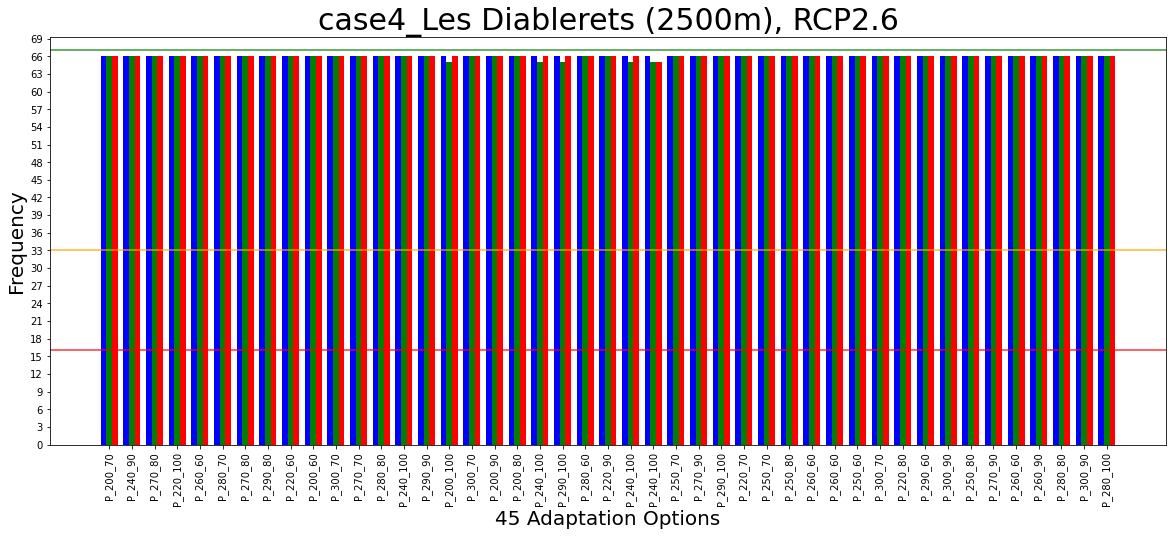

In [33]:
fig35, ax1 = plt.subplots(figsize=(20,7.5))

width = 0.25

ax1.bar(x_26_arr, y_26, width = width, color = 'Blue', label = "2020")
ax1.bar(x1_26_arr, y1_26, width = width, color = 'Green', label = "2050")
ax1.bar(x2_26_arr, y2_26, width = width, color = 'Red', label = "2070")


#X-Axis
xticks = np.arange(0, 45, 1)
ax1.set_xticks(xticks)
#ax1.set_xticks(xticks, all_Policies)

xlabels = all_Policies
#ax1.set_xticklabels(xlabels)
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10, ha="right", rotation_mode="anchor")
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10)
plt.xticks(xticks, xlabels, fontsize=16)
plt.setp(ax1.get_xticklabels(), rotation=90, size = 10)



#Y-Axis
yticks = np.arange(0, 70, 3)
#ax1.set_yticks(yticks)
#plt.setp(ax1.get_yticklabels(), rotation=0, size = 15, ha="right", rotation_mode="anchor")

ax1.set_yticks(yticks)
ax1.set_title(title_Figs + ', RCP2.6', size = 30)
ax1.set_xlabel('45 Adaptation Options', size = 20)
ax1.set_ylabel('Frequency', size = 20)


ax1.axhline(y=67, color='green', alpha=0.8)
ax1.axhline(y=33, color='orange', alpha=0.8)
ax1.axhline(y=16, color='red', alpha=0.8)
#ax1.set_ylim(bottom=0, top =70)
#ax1.y_axis = np.arange(0, 70)

fig35.savefig(os.path.join(rootOut, 'tipping_point_All_new_3_RCP26.tiff'), format='tiff', dpi=150)

In [34]:
x_45_arr = np.array(x_45) - 0.25
x1_45_arr = np.array(x1_45)
x2_45_arr = np.array(x2_45) + 0.25

In [35]:
y2_45

[67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 66.0,
 66.0,
 65.0,
 64.0]

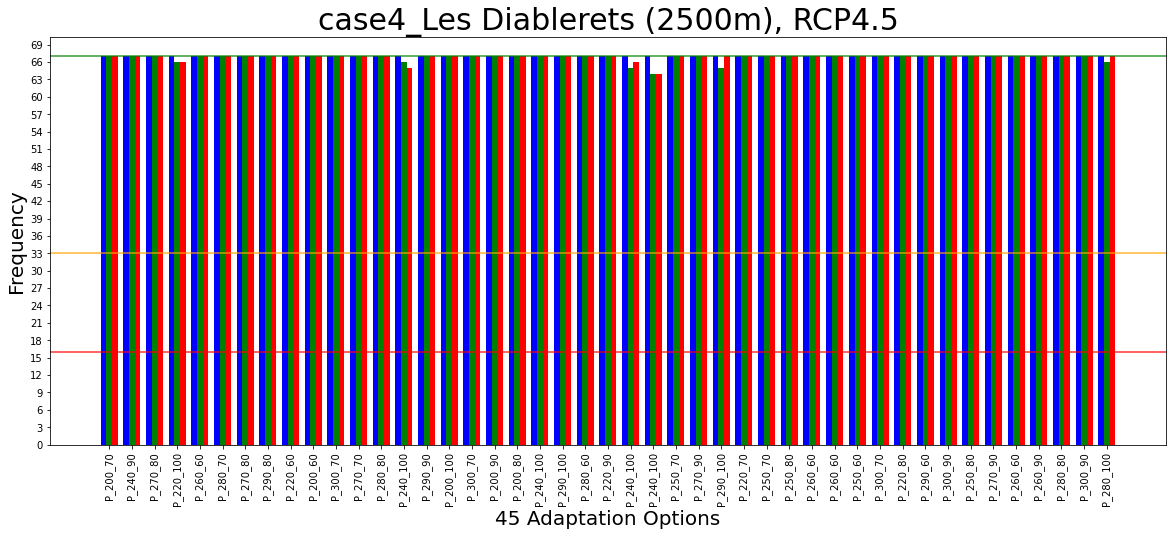

In [36]:
fig36, ax1 = plt.subplots(figsize=(20,7.5))

width = 0.25

ax1.bar(x_45_arr, y_45, width = width, color = 'Blue', label = "2020")
ax1.bar(x1_45_arr, y1_45, width = width, color = 'Green', label = "2050")
ax1.bar(x2_45_arr, y2_45, width = width, color = 'Red', label = "2070")


#X-Axis
xticks = np.arange(0, 45, 1)
ax1.set_xticks(xticks)
#ax1.set_xticks(xticks, all_Policies)

xlabels = all_Policies
#ax1.set_xticklabels(xlabels)
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10, ha="right", rotation_mode="anchor")
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10)
plt.xticks(xticks, xlabels, fontsize=16)
plt.setp(ax1.get_xticklabels(), rotation=90, size = 10)



#Y-Axis
yticks = np.arange(0, 70, 3)
#ax1.set_yticks(yticks)
#plt.setp(ax1.get_yticklabels(), rotation=0, size = 15, ha="right", rotation_mode="anchor")

ax1.set_yticks(yticks)
ax1.set_title(title_Figs + ', RCP4.5', size = 30)
ax1.set_xlabel('45 Adaptation Options', size = 20)
ax1.set_ylabel('Frequency', size = 20)

ax1.axhline(y=67, color='green', alpha=0.8)
ax1.axhline(y=33, color='orange', alpha=0.8)
ax1.axhline(y=16, color='red', alpha=0.8)
#ax1.set_ylim(bottom=0, top =70)
#ax1.y_axis = np.arange(0, 70)
fig36.savefig(os.path.join(rootOut, 'tipping_point_All_new_3_RCP45.tiff'), format='tiff', dpi=150)

In [37]:
x_85_arr = np.array(x_85) - 0.25
x1_85_arr = np.array(x1_85)
x2_85_arr = np.array(x2_85) + 0.25

In [38]:
y2_85

[67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 66.0,
 66.0,
 66.0,
 66.0,
 66.0,
 66.0,
 66.0,
 65.0,
 64.0,
 64.0,
 63.0,
 62.0,
 61.0,
 59.0,
 59.0,
 57.0,
 54.0,
 51.0,
 50.0]

In [39]:
x2_85_arr

array([ 0.25, 14.25, 18.25, 11.25, 10.25, 21.25,  9.25,  8.25,  7.25,
       25.25, 26.25, 28.25, 29.25, 30.25, 31.25, 32.25, 34.25, 36.25,
       38.25, 40.25,  5.25,  4.25, 33.25, 35.25,  2.25, 16.25,  6.25,
        1.25, 12.25, 22.25, 42.25, 37.25, 39.25, 41.25, 15.25, 19.25,
       17.25, 43.25, 20.25, 27.25,  3.25, 13.25, 23.25, 44.25, 24.25])

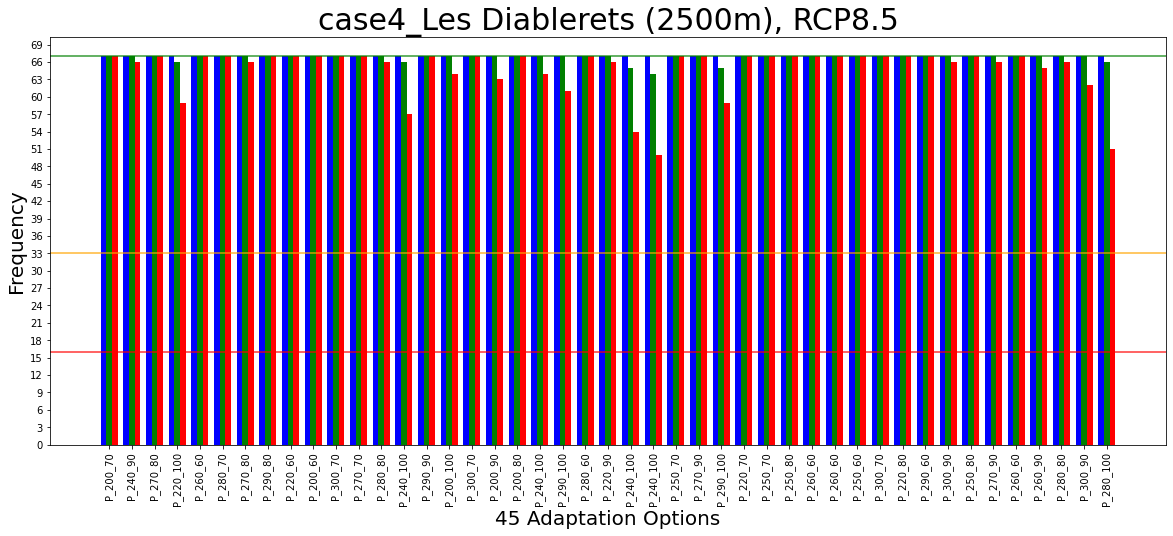

In [40]:
fig37, ax1 = plt.subplots(figsize=(20,7.5))

width = 0.25

ax1.bar(x_85_arr, y_85, width = width, color = 'Blue', label = "2020")
ax1.bar(x1_85_arr, y1_85, width = width, color = 'Green', label = "2050")
ax1.bar(x2_85_arr, y2_85, width = width, color = 'Red', label = "2070")


#X-Axis
xticks = np.arange(0, 45, 1)
ax1.set_xticks(xticks)
#ax1.set_xticks(xticks, all_Policies)

xlabels = all_Policies
#ax1.set_xticklabels(xlabels)
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10, ha="right", rotation_mode="anchor")
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10)
plt.xticks(xticks, xlabels, fontsize=16)
plt.setp(ax1.get_xticklabels(), rotation=90, size = 10)



#Y-Axis
yticks = np.arange(0, 70, 3)
#ax1.set_yticks(yticks)
#plt.setp(ax1.get_yticklabels(), rotation=0, size = 15, ha="right", rotation_mode="anchor")

ax1.set_yticks(yticks)
ax1.set_title(title_Figs + ', RCP8.5', size = 30)
ax1.set_xlabel('45 Adaptation Options', size = 20)
ax1.set_ylabel('Frequency', size = 20)

ax1.axhline(y=67, color='green', alpha=0.8)
ax1.axhline(y=33, color='orange', alpha=0.8)
ax1.axhline(y=16, color='red', alpha=0.8)
#ax1.set_ylim(bottom=0, top =70)
#ax1.y_axis = np.arange(0, 70)
fig37.savefig(os.path.join(rootOut, 'tipping_point_All_new_3_RCP85.tiff'), format='tiff', dpi=150)